# Leverage R's power of functional programming to compute pairwise correlations of stock tickers

## To achieve this we can decompose the project into the following task

### - 1. Obtain the names of the stocks
### - 2. Make sure the are valid stocks
### - 3. Connect to a database that has this stock and pull the infomation into memmory
### - 4. Clean up the data by identifying missing values
### - 5. Put all the data into a data frame
### - 6. Compute the pairwise correlation and return the results
### - 7. create a visual of pairwise correlation.

In [2]:
# - 1.

filter_and_sort_symbols <- function(symbols) {
  # Name: filter_symbols
  # Purpose: convert to uppercase if not in
  # remove all non valid symbols
  # Input: symbols = vector of stock tickers
  # Output: filtered_symbols = filtered symbols
  
  # convert symbols to uppercase
  symbols <- toupper(symbols)
  
  # validate the symbol names
  valid <- regexpr("^[A-Z]{2,4}$", symbols)
  
  # return only the valid symbols
  return(sort(symbols[valid==1]))
}


In [3]:
# - 2.
extract_prices <- function(filtered_symbols, file_path){
  # Name: extract_prices
  # Purpose: Read price data from specified file
  # Input: filtered_symbol = vector of symbols
          # file_path = location of price data 
  # Output: prices = data.frame of price per symbol
  
  # Read in the csv file
  all_prices = read.csv(file = file_path, header = TRUE, stringsAsFactors =  FALSE)
  
  # Make the Date row name
  rownames(all_prices) <- all_prices$Date
  
  # Remove original Date column
  all_prices$Date <- NULL
  
  # Extract only the relevant data columns
  valid_columns <- colnames(all_prices) %in% filtered_symbols
  
  return(all_prices[, valid_columns])
  
}


In [4]:
# - 3.

filtered_prices <- function(prices){
  # Name: filter_prices
  # Purpose: Identify the rows with missing values
  # Input: prices = data.frame of prices
  # Output: missing_rows = vector of indexes where
  # data is missing in any of the columns
  
  # return a boolean vector of good or bad rowa
  valid_rows = complete.cases(prices)
  
  # Identify the index of missing rows
  missing_rows <- which(valid_rows == FALSE)
  
  return(missing_rows)
}

In [5]:
# - 4.
compute_pairwise_correlation <- function(prices) {
  # Name: compute_pairwise_correlation
  # Purpose: Calculate the pairwise correlation of returns
  # and plots the pairwise relationships
  # Input: prices = data.frame of prices
  # Output: correlation_matrix = A correlation matrix
  
  # convert prices to returns
  returns <- apply(prices, 2, function(x) diff(log(x)))
  
  # Plot all pairwise relationship
  pairs(returns, main = "Pairwise return scatter plot")
  
  correlation_matrix <- cor(returns, use = "complete.obs")
  
  return(correlation_matrix)
}

In [6]:
# symbols entered by the user
symbols = c("IBM", "XOM", "2SG", "TEva", "GOog", "CVX", "AAPL", "BA")
print(symbols)


[1] "IBM"  "XOM"  "2SG"  "TEva" "GOog" "CVX"  "AAPL" "BA"  


In [7]:
# database path
file_path = "C:/Users/user/project_directory/quatitativee_trading_with_R/prices.csv"



In [8]:
# filter and sort the symbols
filtered_symbols <- filter_and_sort_symbols(symbols)
print(filtered_symbols)


[1] "AAPL" "BA"   "CVX"  "GOOG" "IBM"  "TEVA" "XOM" 


In [9]:

# Extract the prices
prices <- extract_prices(filtered_symbols, file_path)
print(prices)



             AAPL    CVX    IBM    XOM     BA  TEVA
2007-01-03  80.10  55.48  85.07  62.22  74.52 27.20
2007-01-04  81.88  54.94  85.98  61.06  74.82 27.53
2007-01-05  81.29  55.15  85.20  61.49  74.50 28.02
2007-01-08  81.69  55.86  86.50  61.00  74.32 28.61
2007-01-09  88.48  55.21  87.52  60.53  73.54 28.55
2007-01-10  92.71  54.26  86.49  59.60  74.60 28.62
2007-01-11  91.57  53.70  86.28  59.60  74.24 28.39
2007-01-12  90.44  55.00  86.88  61.01  73.65 28.48
2007-01-16  92.81  54.46  88.18  60.14  73.54 28.62
2007-01-17  90.75  55.36  87.48  60.84  74.23 28.61
2007-01-18  85.13  55.44  86.98  60.42  73.54 29.52
2007-01-19  84.59  56.54  84.11  61.74  74.07 29.73
2007-01-22  82.96  55.68  84.93  61.21  71.53 30.18
2007-01-23  81.91  56.72  84.91  62.54  73.00 30.42
2007-01-24  82.87  56.94  85.19  62.89  73.20 30.22
2007-01-25  82.44  55.91  85.28  61.73  72.00 29.93
2007-01-26  81.61  55.89  85.23  61.80  71.39 30.11
2007-01-29  82.14  55.92  86.18  61.46  71.45 30.24
2007-01-30  

In [10]:
# filter the prices
missing_row <- filtered_prices(prices)
print(missing_row)


integer(0)


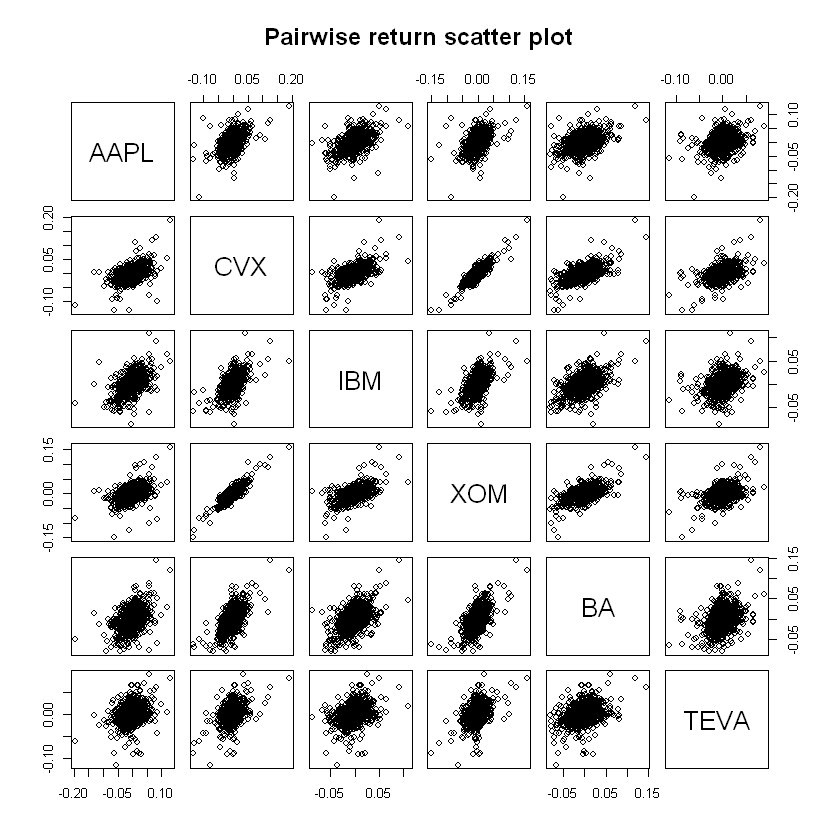

In [11]:

# compute correlations
correlation_matrix <- compute_pairwise_correlation(prices)